In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x * 1./255., input_shape=(120, 160, 3), output_shape=(120, 160, 3)))
    model.add(Conv2D(32, (3, 3), input_shape=(120, 160, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.7))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

    return model

Using TensorFlow backend.
C:\Users\RV\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
model = get_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 120, 160, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 118, 158, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 118, 158, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 77, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 57, 77, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 38, 32)        0         
__________

In [3]:
model.load_weights('binary_model.h5')

In [4]:
epochs = 20
BASE_DIR = '../'
batch_size = 32

import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt
import skimage
from skimage.transform import resize

def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL', 'EOSINOPHIL']:
                label = 'POLYNUCLEAR'
            else:
                label = 'MONONUCLEAR'
            for image_filename in os.listdir(folder + wbc_type):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    # Downsample the image to 120, 160, 3
                    img_file = skimage.transform.resize(img_file, (120, 160, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [13]:
import cv2
img_file = cv2.imread(r'C:/Users/RV/Downloads/wbc-classification-master/images/TEST_SIMPLE/LYMPHOCYTE/_0_3975.jpeg')

In [14]:
import skimage
from skimage.transform import resize
img_file = skimage.transform.resize(img_file , (120, 160, 3))

C:\Users\RV\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


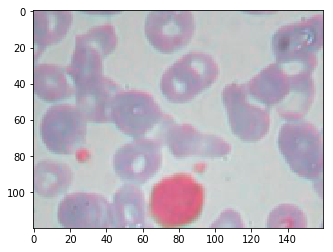

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img_file)

In [16]:
img_arr = np.asarray(img_file)

In [17]:
img_arr = np.reshape(img_arr,[1,120,160,3])

In [18]:
y_pred = np.rint(model.predict(img_arr))

In [19]:
y_pred

array([[ 1.]], dtype=float32)

In [20]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(weights)

[]
[array([[[[-0.10574624,  0.12210432, -0.13779458, -0.04568234, -0.04604877,
          -0.21573396, -0.17377231, -0.0180279 ,  0.04940759, -0.16289277,
          -0.05806075,  0.08410205,  0.124309  ,  0.00243124, -0.04952017,
          -0.12110258,  0.11455054,  0.07855591, -0.02271239,  0.07015857,
           0.07022295, -0.01874147, -0.11334342,  0.08308888, -0.15045892,
           0.13363166,  0.10919678,  0.08373791, -0.04409526, -0.05157845,
           0.08073696,  0.12886076],
         [-0.137797  ,  0.06454021, -0.03743299,  0.10834913,  0.05136139,
          -0.08095045,  0.02219084, -0.00869794,  0.1270168 ,  0.09182267,
           0.00642191, -0.04594485, -0.01660504, -0.09136236, -0.11732129,
           0.09637225, -0.10892731,  0.02274681, -0.03505274,  0.1211714 ,
           0.1223217 ,  0.07281253,  0.08457039,  0.06887461, -0.08829381,
          -0.08593995, -0.01711256,  0.10126238,  0.15485227, -0.08328144,
          -0.1715036 , -0.06331928],
         [-0.03758203,